In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/TigeressQueen/Downloads/Python for Data Science/DS_mod8/')

In [3]:
dataset = pd.read_csv('breast-cancer-data.csv')

In [61]:
print (dataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perim

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_data = le.fit_transform(dataset['diagnosis'])

In [5]:
dataset.drop(['diagnosis'], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [7]:
from sklearn.decomposition import PCA
#First two components

pca = PCA(n_components=2)
dataset_2D = pca.fit_transform(scaled_data)

In [8]:
dataset_2D_df = pd.DataFrame(dataset_2D)
dataset_2D_df.columns = ['PC1','PC2']
dataset_2D_df.head()

,PC1,PC2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689


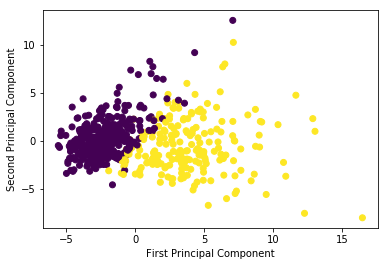

In [9]:
plt.scatter(dataset_2D_df['PC1'],dataset_2D_df['PC2'], c=encode_data, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [10]:
print (pca.explained_variance_ratio_)

[0.42864701 0.18376792]


In [19]:
#Check with 3 components

pca_3 = PCA(n_components=3)
PCA3 = pca_3.fit_transform(scaled_data)
PCA_3 = pd.DataFrame(PCA3)
PCA_3.columns = ['PC1','PC2','PC3']

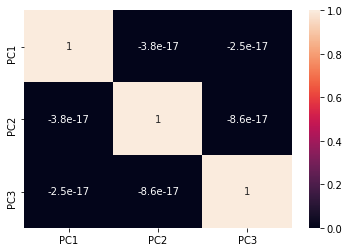

In [20]:
import seaborn as sns

sns.heatmap(PCA_3.corr(), annot=True)

In [12]:
print (pca_3.explained_variance_ratio_)

[0.42864701 0.18376792 0.09146436]


In [78]:
#Check the accuracy for 2 and 3 components

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_output, test_output = train_test_split(scaled_data,
encode_data, test_size=0.3, random_state=101)

In [14]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [15]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(solver = 'lbfgs')
regressor.fit(train_data,train_output)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
regressor.score(test_data,test_output)

0.9473684210526315

In [17]:
# Score for 3 components

train_data, test_data, train_output, test_output = train_test_split(scaled_data,
encode_data, test_size=0.3, random_state=101)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)

regressor.fit(train_data,train_output)
regressor.score(test_data,test_output)

0.9415204678362573